<a href="https://colab.research.google.com/github/shrishti-04/MajorProjectDepresso/blob/master/Machine_Learning_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <p style="padding:10px;background-color:#000000;margin:0;color:white;font-family:newtimeroman;font-size:135%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">MOOODIFY </p>
<p style="text-align:center; ">
<img src="https://img.lovepik.com/photo/40186/6783.jpg_wh860.jpg" style='width: 600px; height: 300px;'>
</p>




<a id="1"></a>
# <p style="padding:10px;background-color:Black;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">IMPORTING LIBRARIES</p>

In [1]:
# packages

# standard
import numpy as np
import pandas as pd
import time 

# plots
import matplotlib.pyplot as plt
import seaborn as sns

# string functions
import string


# NLTK
from nltk import word_tokenize, bigrams
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

# ML


# other stuff
from collections import Counter

In [2]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

<a id="2"></a>
# <p style="padding:10px;background-color:black;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">ABOUT DATASET</p>

- This dataset contains information  in excel format which comprises around 6500 data from social media, Facebook comments, posts, etc.
-  All the people selected for data annotation are very well in English Language and are undergraduate students


- There are two columns in this dataset. Text and labels are the two types
- Normal and anxiety/depression text is present in the text columns, and the label column indicates whether the corresponding text denotes anxiety or depression.



In [3]:
df = pd.read_excel('/content/Depression (1).xlsx')
df.columns

Index(['text', 'label', 'Age', 'Gender', 'Age Category'], dtype='object')

<a id="4"></a>
# <p style="padding:10px;background-color:black;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Dataset Summary</p>


In [4]:
print(f"Shape of The Student  Dataset : {df.shape}")
print(f"\nGlimpse of The Dataset :")
df.head().style.set_properties(**{"background-color": "#E5E4E2","color":"BLACK","border": "1.5px  solid black"})


Shape of The Student  Dataset : (7464, 5)

Glimpse of The Dataset :


,text,label,Age,Gender,Age Category
0,let Gather For Party,0,16,Male,Teen Age
1,I hate being alive when I feel so dead inside. Time to make the exterior match,1,17,Female,Teen Age
2,Exam are Comimg I m already Feeling Very Depressed,1,16,Male,Teen Age
3,Nice picture,0,16,Male,Teen Age
4,"Feeling worried, even though you actually have a God who is ready to help you in any case.",1,16,Male,Teen Age


In [5]:
df.tail().style.set_properties(**{"background-color": "#E5E4E2","color":"BLACK","border": "1.5px  solid black"})

,text,label,Age,Gender,Age Category
7459,"Come to my House , we will watch Movie",0,17,Male,Teen Age
7460,"Life is cheap, what is expensive is your prestige.",0,15,Female,Young Age
7461,"My classmate Bully me Because of my dark skin, sometimes I feel to go for surgery It hurts me & I lost my inner confindence",1,17,Female,Teen Age
7462,this girl who bullied me in school somehow found my Twitter even tho we have no mutuals . I m Scared !,1,16,Female,Teen Age
7463,Keep thinking positive even though they are not as positive as we think...,0,15,Female,Young Age


In [6]:
print(f"Informations About Dataset :\n")
print(df.info())

Informations About Dataset :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7464 entries, 0 to 7463
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   text          7454 non-null   object
 1   label         7464 non-null   int64 
 2   Age           7464 non-null   int64 
 3   Gender        7464 non-null   object
 4   Age Category  7464 non-null   object
dtypes: int64(2), object(3)
memory usage: 291.7+ KB
None


In [7]:
print(f"Summary of The  Dataset :")
df.describe().T.style.set_properties(**{"background-color": "#E5E4E2","color":"black","border": "1.5px  solid black"})

Summary of The  Dataset :


,count,mean,std,min,25%,50%,75%,max
label,7464.000000,0.162379,0.368823,0.000000,0.000000,0.000000,0.000000,1.000000
Age,7464.000000,15.376206,1.057861,13.000000,14.000000,15.000000,16.000000,17.000000


In [8]:
df.describe(include=object).T.style.set_properties(**{"background-color": "#E5E4E2","color":"black","border": "1.5px  solid black"})

,count,unique,top,freq
text,7454,7346,ni-ki best boy,11
Gender,7464,2,Male,4059
Age Category,7464,2,Young Age,3971


In [9]:
print("Null Values of Dataset :")
df.isna().sum().to_frame().T.style.set_properties(**{"background-color": "#E5E4E2","color":"black","border": "1.5px  solid black"})

Null Values of Dataset :


,text,label,Age,Gender,Age Category
0,10,0,0,0,0


In [10]:
print("After Dropping, Null Values of  Dataset :")
df.dropna(axis = 0, inplace = True)
df.isna().sum().to_frame().T.style.set_properties(**{"background-color": "#E5E4E2","color":"black","border": "1.5px  solid black"})

After Dropping, Null Values of  Dataset :


,text,label,Age,Gender,Age Category
0,0,0,0,0,0


In [11]:
dup_df = df[df.duplicated()].shape[0]
print(f"There are {dup_df} duplicate entries among {df.shape[0]} entries in  dataset.")

There are 36 duplicate entries among 7454 entries in  dataset.


In [12]:
df = df.sample(frac = 1)

In [13]:
df['label'].value_counts().to_frame().T.style.set_properties(**{"background-color": "#E5E4E2","color":"black","border": "1.5px  solid black"})

,0,1
label,6245,1209


<a id="4"></a>
# <p style="padding:10px;background-color:black;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Dataset Visualization</p>

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Freq')

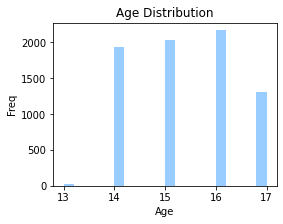

In [14]:
fig,ax = plt.subplots(figsize=(4,3))
sns.distplot(df['Age'].dropna(),ax=ax,kde=False,color='#0080ff')
plt.title('Age Distribution')
plt.ylabel('Freq')


Glimpse of The Gender of Students :


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Gender')

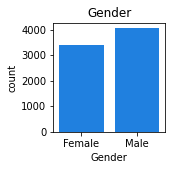

In [15]:
print(f"\nGlimpse of The Gender of Students :")
sns.countplot(df['Gender'], color='#0080ff')
fig = plt.gcf()
fig.set_size_inches(2,2)
plt.title('Gender')


Glimpse of The Age Category of Students :


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Age Category Of Students')

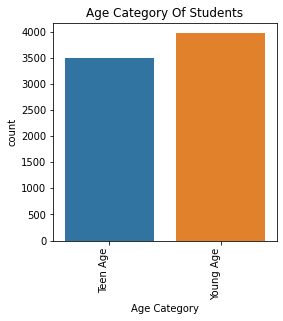

In [16]:
print(f"\nGlimpse of The Age Category of Students :")
sns.countplot(df['Age Category'])
sns.countplot(df['Age Category']).set_xticklabels(sns.countplot(df['Age Category']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(4,4)
plt.title('Age Category Of Students')


Glimpse of The Age of Students :


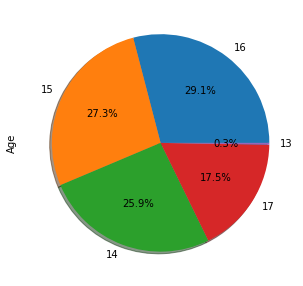

In [17]:
print(f"\nGlimpse of The Age of Students :")
df['Age'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(5,5))
plt.show()


Glimpse of Relation Between Label and Age Group of Students :


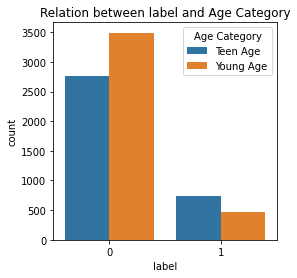

In [18]:
print(f"\nGlimpse of Relation Between Label and Age Group of Students :")
plt.figure(figsize=(4,4))
sns.countplot(x='label',hue='Age Category',data=df)
plt.title('Relation between label and Age Category')
plt.show()


Glimpse of Relation Between Gender and Age  of Students :


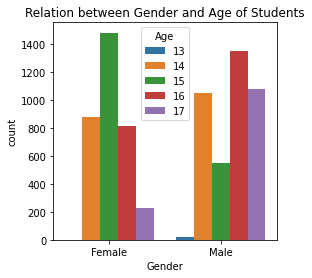

In [19]:
print(f"\nGlimpse of Relation Between Gender and Age  of Students :")
plt.figure(figsize=(4,4))
sns.countplot(x='Gender',hue='Age',data=df)
plt.title('Relation between Gender and Age of Students')
plt.show()

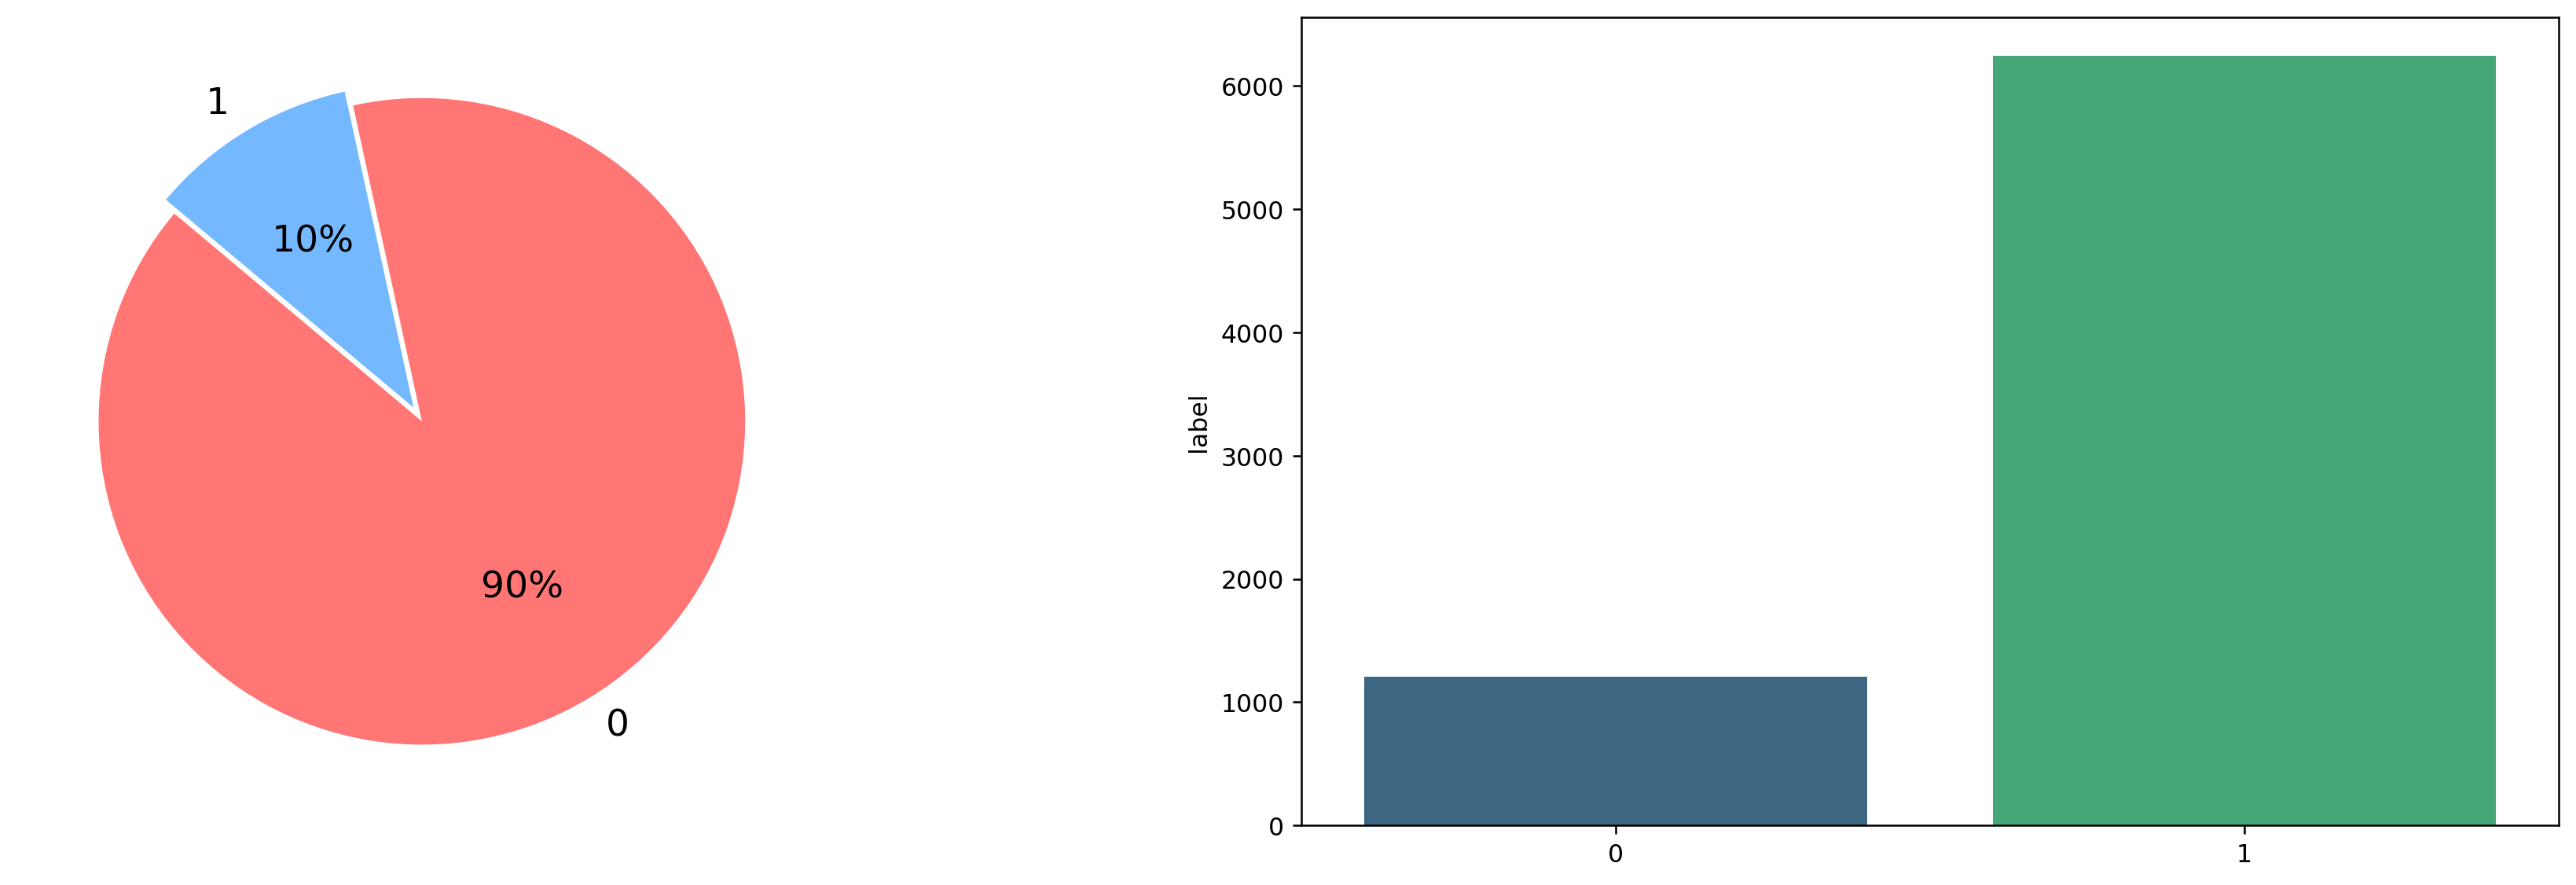

In [20]:
labels = [0,1]
sizes = [6240, 730]
custom_colours = ['#ff7675', '#74b9ff']

plt.figure(figsize=(20, 6), dpi=227)
plt.subplot(1, 2, 1)
plt.pie(sizes, labels = labels, textprops={'fontsize': 15}, startangle=140, 
       autopct='%1.0f%%', colors=custom_colours, explode=[0, 0.05])

plt.subplot(1, 2, 2)
sns.barplot(x = df['label'].unique(), y = df['label'].value_counts(), palette= 'viridis')

plt.show()

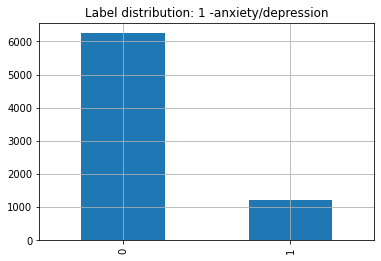

In [21]:
df.label.value_counts().plot(kind='bar')
plt.title('Label distribution: 1 -anxiety/depression')
plt.grid()
plt.show()

In [22]:
pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
from wordcloud import WordCloud

<a id="4"></a>
# <p style="padding:10px;background-color:black;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Preprocessing Text</p>


In [24]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import spacy
import string
from bs4 import BeautifulSoup

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [25]:
pip install spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [27]:
def text_transformation(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

 ## Contraction Mapping

In [28]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

In [29]:
def text_cleaner(text):
    newString = text.lower()
    newString = BeautifulSoup(newString, "lxml").text
    newString = re.sub(r'\([^)]*\)', '', newString)
    newString = re.sub('"','', newString)
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])    
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString) 
    newString = re.sub('[m]{2,}', 'mm', newString)
    return newString

In [30]:
pip install beautifulsoup4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
print(df)

                                                   text  label  Age  Gender  \
4252                             how can I end my life.      1   17  Female   
5089  If you win the Cibu dollar, it's a real flip, ...      0   16  Female   
6545  Yo\(Â´âˆ‡`)/ muhammadakbarb AyoBantu Retweet &...      0   15  Female   
3967   Oops, I'm confused whether to join bukber or not      0   15    Male   
7359               How come this game theory scares me?      0   15  Female   
...                                                 ...    ...  ...     ...   
6560         Waking up feeling stuck is a bit scary huh      0   15  Female   
543                 Dear task:. You are very possessive      0   16    Male   
6206                       start pulling back his trust      0   15  Female   
1221  I didn't realize that yesterday my fast was ca...      0   16    Male   
1496  The brain is now full of stressful thoughts. I...      1   17    Male   

     Age Category  
4252     Teen Age  
5089     Te

In [32]:
df['cleaned'] = df["text"].apply(text_cleaner)

In [33]:
pip install lxml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<a id="4"></a>
# <p style="padding:10px;background-color:black;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500"> Visualizing WordCloud</p>



Glimpse of Student Text WordCloud :


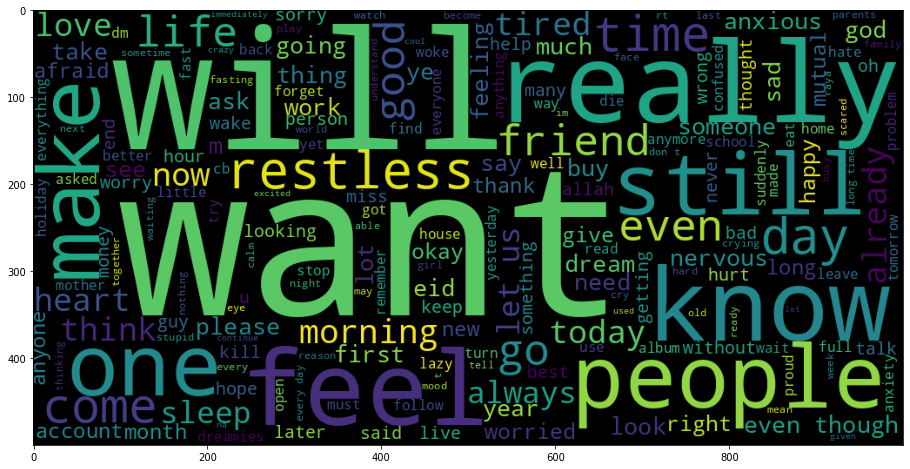

In [34]:
print(f"\nGlimpse of Student Text WordCloud :")
from wordcloud import WordCloud
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = 20,8
word_cloud = ""
for row in df['cleaned']:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='black',min_font_size = 6).generate(word_cloud)
plt.imshow(wordcloud)

In [35]:
pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
text_0 = " ".join(xx for xx in df.text[df.label==0])
text_1 = " ".join(xx for xx in df.text[df.label==1])


Glimpse of Normal Text WordCloud :


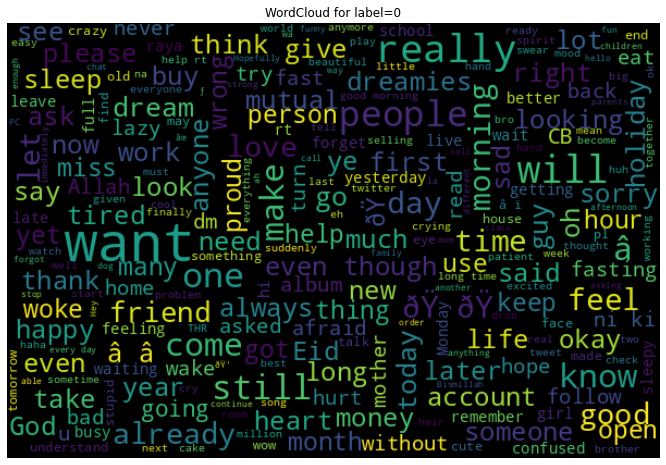

In [37]:
print(f"\nGlimpse of Normal Text WordCloud :")
wordcloud = WordCloud( max_font_size=50, max_words=250,
                      width = 600, height = 400,
                      background_color='black').generate(text_0)
plt.figure(figsize=(12,8))
plt.title('WordCloud for label=0')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


Glimpse of Depressed Text WordCloud :


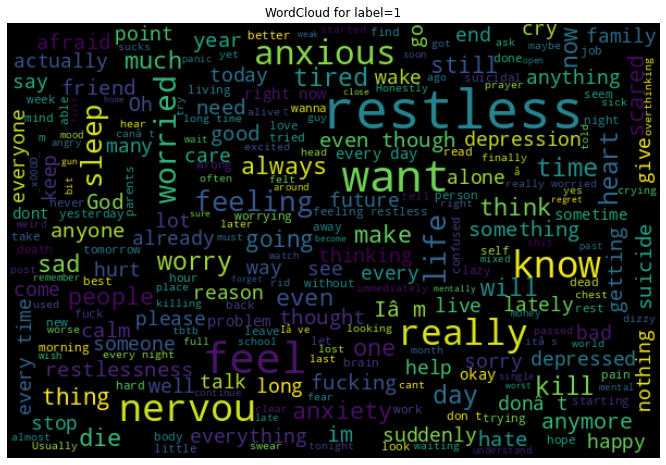

In [38]:
print(f"\nGlimpse of Depressed Text WordCloud :")
wordcloud = WordCloud( max_font_size=50, max_words=250,
                      width = 600, height = 400,
                      background_color='black').generate(text_1)
plt.figure(figsize=(12,8))
plt.title('WordCloud for label=1')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

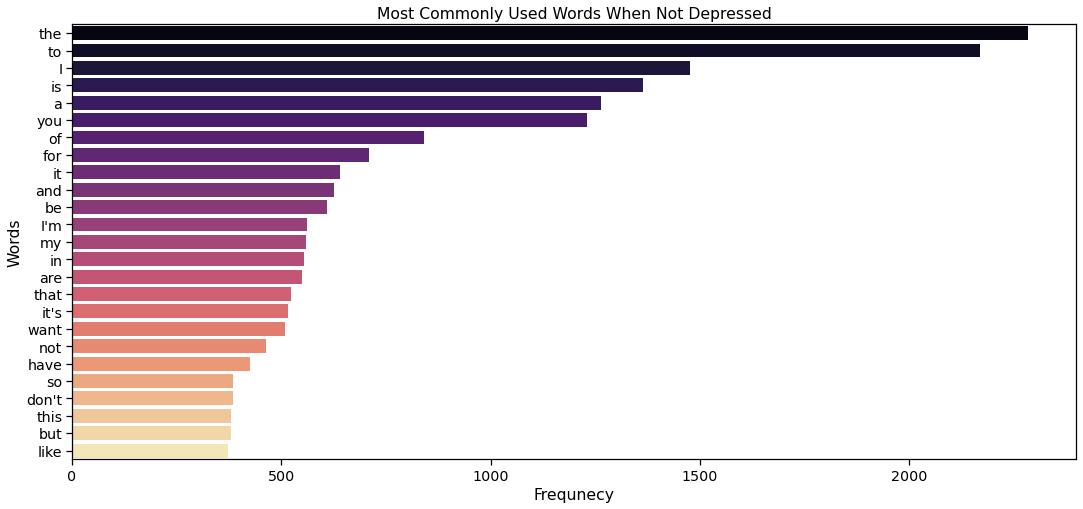

In [39]:
all_nodep_words = []
for sentence in df[df['label'] == 0]['text'].to_list():
    for word in sentence.split():
        all_nodep_words.append(word)

dk = pd.DataFrame(Counter(all_nodep_words).most_common(25), columns= ['Word', 'Frequency'])

sns.set_context('notebook', font_scale= 1.3)
plt.figure(figsize=(18,8))
sns.barplot(y=dk['Word'], x=dk['Frequency'], palette='magma')
plt.title("Most Commonly Used Words When Not Depressed")
plt.xlabel("Frequnecy")
plt.ylabel("Words")
plt.show()

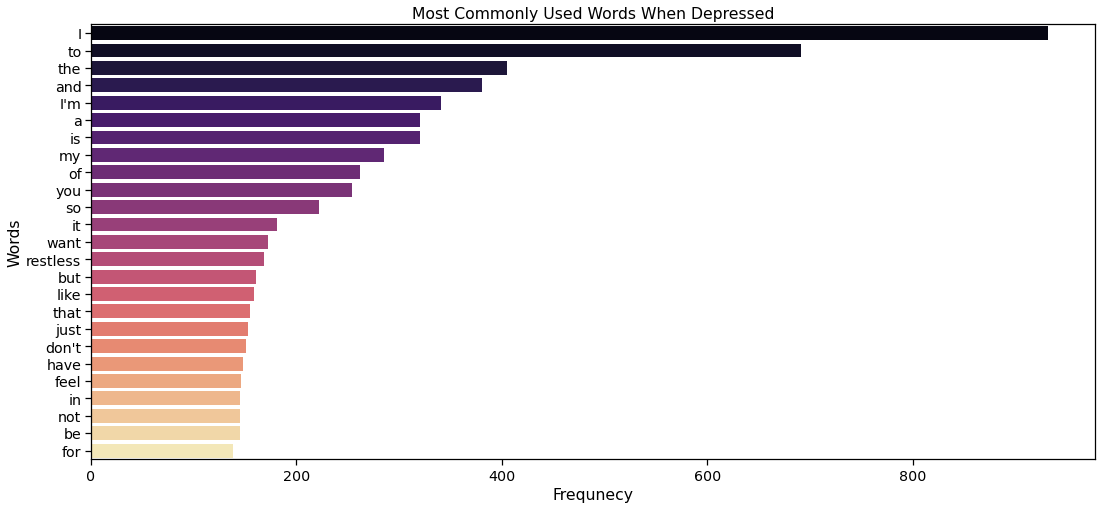

In [40]:
all_dep_words = []
for sentence in df[df['label'] == 1]['text'].to_list():
    for word in sentence.split():
        all_dep_words.append(word)

dl = pd.DataFrame(Counter(all_dep_words).most_common(25), columns= ['Word', 'Frequency'])

sns.set_context('notebook', font_scale= 1.3)
plt.figure(figsize=(18,8))
sns.barplot(y = dl['Word'], x= dl['Frequency'], palette= 'magma')
plt.title("Most Commonly Used Words When Depressed")
plt.xlabel("Frequnecy")
plt.ylabel("Words")
plt.show()

In [41]:
df.tail().style.set_properties(**{"background-color": "#E5E4E2","color":"BLACK","border": "1.5px  solid black"})

,text,label,Age,Gender,Age Category,cleaned
6560,Waking up feeling stuck is a bit scary huh,0,15,Female,Young Age,waking up feeling stuck is a bit scary huh
543,Dear task:. You are very possessive,0,16,Male,Teen Age,dear task you are very possessive
6206,start pulling back his trust,0,15,Female,Young Age,start pulling back his trust
1221,I didn't realize that yesterday my fast was canceled because I ate fiber cream. I just realized today . It's so funny!,0,16,Male,Teen Age,i did not realize that yesterday my fast was canceled because i ate fiber cream i just realized today it is so funny
1496,"The brain is now full of stressful thoughts. I feel like I'm about to explode, nervous, sad, scared, all mixed into one",1,17,Male,Teen Age,the brain is now full of stressful thoughts i feel like i am about to explode nervous sad scared all mixed into one


<a id="1"></a>
# <p style="padding:10px;background-color:Black;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">MACHINE LEARNING MODEL</p>

## Feature Extraction with CountVectorizer

In [42]:
X = df.cleaned
y = df.label

In [43]:
vect = CountVectorizer(max_features = 20000 , lowercase=False , ngram_range=(1,2))

In [44]:
X_cv =vect.fit_transform(X).toarray()

In [45]:
X_cv.shape

(7454, 20000)

In [46]:
df.cleaned

4252                               how can i end my life 
5089    if you win the cibu dollar  it is a real flip ...
6545    yo   muhammadakbarb ayobantu retweet   cekidot...
3967    oops  i am confused whether to join bukber or not
7359                 how come this game theory scares me 
                              ...                        
6560           waking up feeling stuck is a bit scary huh
543                   dear task   you are very possessive
6206                         start pulling back his trust
1221    i did not realize that yesterday my fast was c...
1496    the brain is now full of stressful thoughts  i...
Name: cleaned, Length: 7454, dtype: object

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X_cv,y,test_size = 0.2,random_state = 1,stratify = y)

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,VotingClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [49]:
def performance_eval(clf,X_test):
    y_pred = clf.predict(X_test)
    print(f'Accuracy : {accuracy_score(y_test,y_pred)}\n')
    print('   ------------ Classification Report -----------')
    print(classification_report(y_test,y_pred))
    print('   ------------ Confusion Matrix -------------- ')
    sns.set(rc={'figure.figsize':(10,6)})
    sns.heatmap(confusion_matrix(y_test,y_pred),annot = True,fmt = 'd')

<a id="1"></a>
# <p style="padding:7px;background-color:Black;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Logistic Regression</p>

Accuracy : 0.9617706237424547

   ------------ Classification Report -----------
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1249
           1       0.95      0.81      0.87       242

    accuracy                           0.96      1491
   macro avg       0.96      0.90      0.93      1491
weighted avg       0.96      0.96      0.96      1491

   ------------ Confusion Matrix -------------- 


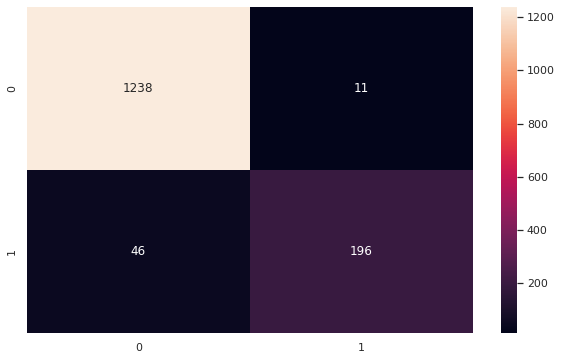

In [50]:
clf_lr = LogisticRegression()
clf_lr.fit(X_train, y_train)
performance_eval(clf_lr,X_test)

<a id="1"></a>
# <p style="padding:7px;background-color:Black;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Naive Bayes</p>

Accuracy : 0.9175050301810865

   ------------ Classification Report -----------
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      1249
           1       0.70      0.87      0.77       242

    accuracy                           0.92      1491
   macro avg       0.84      0.90      0.86      1491
weighted avg       0.93      0.92      0.92      1491

   ------------ Confusion Matrix -------------- 


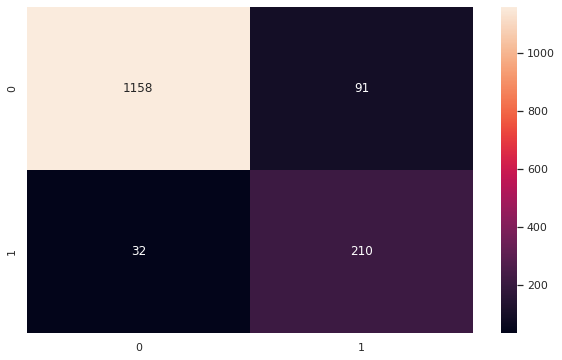

In [51]:
clf_nb = MultinomialNB()
clf_nb.fit(X_train, y_train)
performance_eval(clf_nb,X_test)

<a id="1"></a>
# <p style="padding:7px;background-color:Black;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Decision Tree</p>

Accuracy : 0.9450033534540577

   ------------ Classification Report -----------
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1249
           1       0.81      0.87      0.84       242

    accuracy                           0.95      1491
   macro avg       0.89      0.91      0.90      1491
weighted avg       0.95      0.95      0.95      1491

   ------------ Confusion Matrix -------------- 


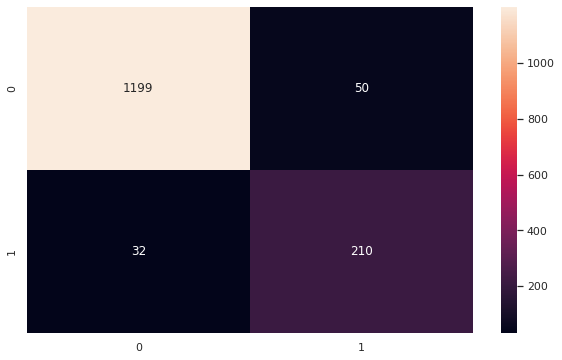

In [52]:
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train, y_train)
performance_eval(clf_dt,X_test)

<a id="1"></a>
# <p style="padding:7px;background-color:Black;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Support Vector Machine</p>

Accuracy : 0.9141515761234071

   ------------ Classification Report -----------
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1249
           1       0.98      0.48      0.64       242

    accuracy                           0.91      1491
   macro avg       0.95      0.74      0.80      1491
weighted avg       0.92      0.91      0.90      1491

   ------------ Confusion Matrix -------------- 


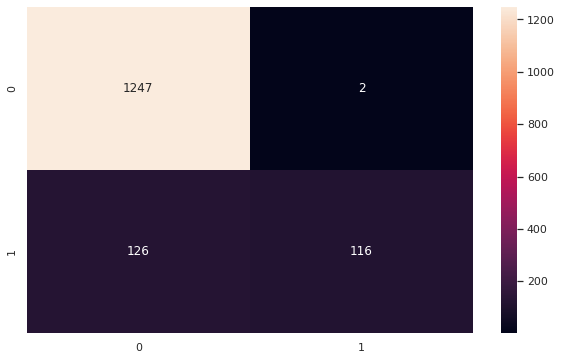

In [53]:
clf_svm = SVC()
clf_svm.fit(X_train, y_train)
performance_eval(clf_svm,X_test)

<a id="1"></a>
# <p style="padding:7px;background-color:Black;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">AdaBoost </p>

Accuracy : 0.9631120053655265

   ------------ Classification Report -----------
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1249
           1       0.95      0.82      0.88       242

    accuracy                           0.96      1491
   macro avg       0.96      0.90      0.93      1491
weighted avg       0.96      0.96      0.96      1491

   ------------ Confusion Matrix -------------- 


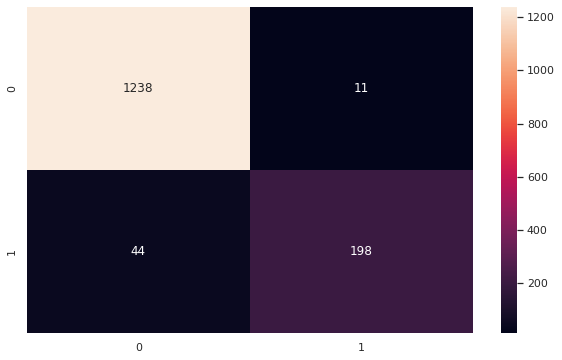

In [54]:
clf_adb = AdaBoostClassifier()
clf_adb.fit(X_train, y_train)
performance_eval(clf_adb,X_test)

<a id="1"></a>
# <p style="padding:7px;background-color:Black;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">KNN</p>

Accuracy : 0.8685446009389671

   ------------ Classification Report -----------
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1249
           1       0.94      0.20      0.33       242

    accuracy                           0.87      1491
   macro avg       0.90      0.60      0.63      1491
weighted avg       0.88      0.87      0.83      1491

   ------------ Confusion Matrix -------------- 


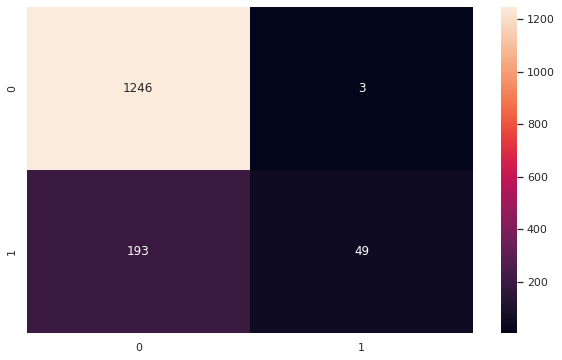

In [55]:
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train, y_train)
performance_eval(clf_knn,X_test)

<a id="1"></a>
# <p style="padding:7px;background-color:Black;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Random Forest</p>

Accuracy : 0.9584171696847753

   ------------ Classification Report -----------
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1249
           1       0.95      0.79      0.86       242

    accuracy                           0.96      1491
   macro avg       0.95      0.89      0.92      1491
weighted avg       0.96      0.96      0.96      1491

   ------------ Confusion Matrix -------------- 


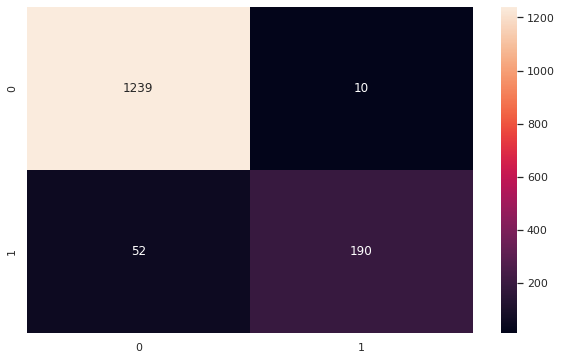

In [56]:
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)
performance_eval(clf_rf,X_test)

Accuracy : 0.9644533869885983

   ------------ Classification Report -----------
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1249
           1       0.98      0.80      0.88       242

    accuracy                           0.96      1491
   macro avg       0.97      0.90      0.93      1491
weighted avg       0.96      0.96      0.96      1491

   ------------ Confusion Matrix -------------- 


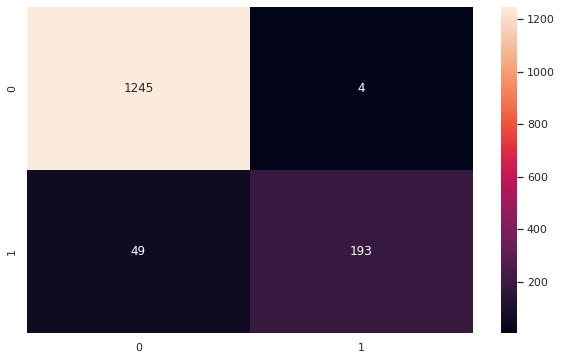

In [57]:
voting_clf = VotingClassifier(estimators=[('SVC', clf_svm),
                                          ('LogReg', clf_lr),
                                          ('RF', clf_rf),
                                          ('AdaBoost',clf_adb),
                                          ('KNN',clf_knn),
                                          ('NB',clf_nb),
                                          ('DT',clf_dt)
                                         ],
                              voting='hard'
                             )
voting_clf.fit(X_train, y_train)
performance_eval(voting_clf,X_test)

In [58]:
import pickle
filename = 'CV_BestModel.sav'
pickle.dump(voting_clf, open(filename, 'wb'))

<a id="1"></a>
# <p style="padding:10px;background-color:Black;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">RESULT EVALUATION</p>

In [59]:
text = "I am / exhauted :) and restless."

In [60]:
clean_text = text_cleaner(text)

In [61]:
loaded_model = pickle.load(open('CV_BestModel.sav', 'rb'))
single_prediction = loaded_model.predict(vect.transform([clean_text]).toarray())[0]

In [62]:
output = {0:"No Anxiety/Depression",
          1:"Anxiety/Depression"}
print(output[single_prediction])

Anxiety/Depression


In [63]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier


lr_model = LogisticRegression(class_weight='balanced', max_iter=400)
dt_model = DecisionTreeClassifier(class_weight='balanced')
rf_model = RandomForestClassifier(class_weight='balanced')
mnb_model = MultinomialNB()
svm_model = SVC(class_weight='balanced')
knn_model = KNeighborsClassifier()
ada_model = AdaBoostClassifier()
model_names = ['Logistic Regression','Decision Tree','Random Forest','Naive Bayes', 'SVM', 'KNN', 'AdaBoost']
ml_models = [lr_model,dt_model,rf_model,mnb_model, svm_model, knn_model, ada_model]

In [65]:
trained_ml_models = []
def model_train(model, train_data, train_labels):
    mf = model.fit(train_data,train_labels)
    trained_ml_models.append(mf)
# trained_ml_models = []
for i in ml_models:
    model_train(i,X_train, y_train)
#     trained_ml_models.append(tt)

In [66]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score


pr_list = []
re_list = []
f1_list = []

def print_results(md, x_test, y_test, name):
    #print("\n\nClassifier: ", name)
    pred_y = md.predict(x_test)
    true, pred = y_test, pred_y

    pr_list.append((round(precision_score(y_test, pred_y, average='weighted'),4)*100)) 
    re_list.append((round(recall_score(y_test, pred_y, average='weighted'),4)*100))
    f1_list.append((round(f1_score(y_test, pred_y, average='weighted'),4)*100))

for i in range(len(trained_ml_models)):
    md = trained_ml_models[i]
    name = model_names[i]
    print_results(md, X_test, y_test, name)

performance_matrix = pd.DataFrame({'Precision':pr_list,
                                   'Recall':re_list,'F1 Score':f1_list},
                                  index =model_names)

In [67]:
performance_matrix.style.set_properties(**{"background-color": "#E5E4E2","color":"BLACK","border": "1.5px  solid black"})

,Precision,Recall,F1 Score
Logistic Regression,95.880000,95.910000,95.890000
Decision Tree,92.490000,91.680000,91.970000
Random Forest,93.230000,93.160000,92.550000
Naive Bayes,92.840000,91.750000,92.100000
SVM,93.640000,93.700000,93.260000
KNN,87.830000,86.850000,83.070000
AdaBoost,96.270000,96.310000,96.200000


In [68]:
data_matrix = pd.DataFrame({
    'Model':model_names,'Precision':pr_list,
                        'Recall':re_list,
                        'F1 Score':f1_list,
                      },
                    )

In [69]:
data_matrix.style.set_properties(**{"background-color": "#E5E4E2","color":"BLACK","border": "1.5px  solid black"})

,Model,Precision,Recall,F1 Score
0,Logistic Regression,95.880000,95.910000,95.890000
1,Decision Tree,92.490000,91.680000,91.970000
2,Random Forest,93.230000,93.160000,92.550000
3,Naive Bayes,92.840000,91.750000,92.100000
4,SVM,93.640000,93.700000,93.260000
5,KNN,87.830000,86.850000,83.070000
6,AdaBoost,96.270000,96.310000,96.200000


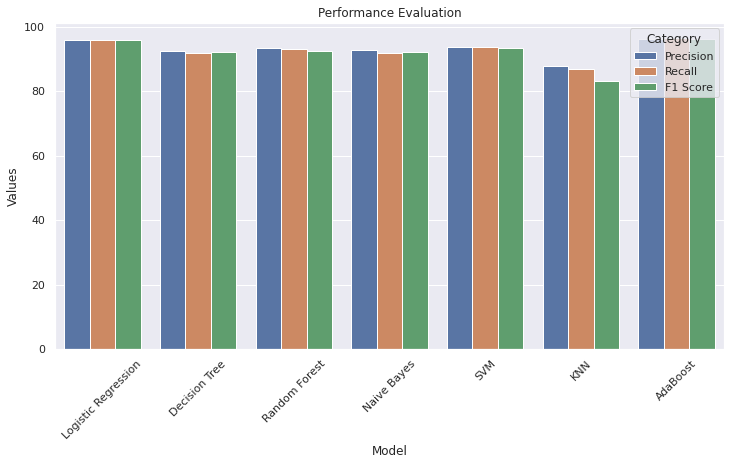

In [70]:
df_1 = pd.melt(data_matrix, id_vars="Model", var_name="Category", value_name="Values")
plt.figure(figsize=(12, 6))
ax = plt.subplot()

sns.barplot(data=df_1,x='Model', y='Values' ,hue='Category')
ax.set_xlabel('Model') 
ax.set_title('Performance Evaluation')

ax.xaxis.set_ticklabels(model_names, rotation=45);
plt.show()